https://www.kaggle.com/competitions/dogs-vs-cats/overview

In [270]:
import os
import numpy as np
import pandas as pd # data processing, CSV file I/O

import matplotlib.pyplot as plt # [시각화] 데이터 분포 확인하려고
import seaborn as sns # [시각화] 데이터 분포 확인하려고

from sklearn.model_selection import train_test_split # 모델 분할
from tensorflow.keras.preprocessing.image import load_img # 이미지로드
from tensorflow.keras.preprocessing.image import ImageDataGenerator # 데이터증가

import tensorflow as tf
from tensorflow.keras import layers # 모델설계 Conv2D, MaxPoolling, Flatten, Dense
from tensorflow.keras import models # 모델설계 Sequential()
from tensorflow.keras import optimizers # 모델 옵티마이저

# 1. 데이터 로드
1. 경로 지정
2. 어떤 데이터가 있을까
3. data split (train:80%  test:20%)
4. 데이터 확인 (전체, 고양이만, 강아지만)

In [16]:
base_dir = os.getcwd()
base_dir = os.path.join(base_dir, "data")

In [281]:
train_dir = './data/train' # 경로지정
val_dir   = './data/val'
test_dir  = './data/test1'
os.mkdir(val_dir)

#### 어떤 데이터들이 있을까

In [21]:
pics = os.listdir(train_dir)
pics

['cat.0.jpg',
 'cat.1.jpg',
 'cat.10.jpg',
 'cat.100.jpg',
 'cat.1000.jpg',
 'cat.10000.jpg',
 'cat.10001.jpg',
 'cat.10002.jpg',
 'cat.10003.jpg',
 'cat.10004.jpg',
 'cat.10005.jpg',
 'cat.10006.jpg',
 'cat.10007.jpg',
 'cat.10008.jpg',
 'cat.10009.jpg',
 'cat.1001.jpg',
 'cat.10010.jpg',
 'cat.10011.jpg',
 'cat.10012.jpg',
 'cat.10013.jpg',
 'cat.10014.jpg',
 'cat.10015.jpg',
 'cat.10016.jpg',
 'cat.10017.jpg',
 'cat.10018.jpg',
 'cat.10019.jpg',
 'cat.1002.jpg',
 'cat.10020.jpg',
 'cat.10021.jpg',
 'cat.10022.jpg',
 'cat.10023.jpg',
 'cat.10024.jpg',
 'cat.10025.jpg',
 'cat.10026.jpg',
 'cat.10027.jpg',
 'cat.10028.jpg',
 'cat.10029.jpg',
 'cat.1003.jpg',
 'cat.10030.jpg',
 'cat.10031.jpg',
 'cat.10032.jpg',
 'cat.10033.jpg',
 'cat.10034.jpg',
 'cat.10035.jpg',
 'cat.10036.jpg',
 'cat.10037.jpg',
 'cat.10038.jpg',
 'cat.10039.jpg',
 'cat.1004.jpg',
 'cat.10040.jpg',
 'cat.10041.jpg',
 'cat.10042.jpg',
 'cat.10043.jpg',
 'cat.10044.jpg',
 'cat.10045.jpg',
 'cat.10046.jpg',
 'cat.1004

In [26]:
data = pd.DataFrame(pics)
data.shape # 25000 x 1
data.head(7)

,0
0,cat.0.jpg
1,cat.1.jpg
2,cat.10.jpg
3,cat.100.jpg
4,cat.1000.jpg
5,cat.10000.jpg
6,cat.10001.jpg


In [39]:
data.rename(columns={0:'image'}, inplace=True ) # 
data.head(3)

,image
0,cat.0.jpg
1,cat.1.jpg
2,cat.10.jpg


In [40]:
data['label'] = data['image'].apply(lambda x: x.split('.')[0])
data.head(3)

,image,label
0,cat.0.jpg,cat
1,cat.1.jpg,cat
2,cat.10.jpg,cat


#### 개수 확인

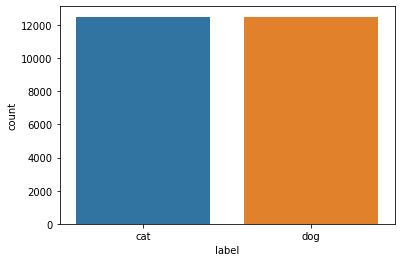

In [57]:
sns.countplot(x = "label", data = data)
plt.show()

#### 데이터 분리 train:0.8, test:0.2

In [234]:
# 개, 고양이 비율유지해서 0.8 0.2로 나눔
train_data, val_data = train_test_split(data
                                        , test_size=0.2
                                        , stratify=data['label'] 
                                        , random_state=123)
train_data.shape # 20000 x2
val_data.shape # 5000 x 2

(5000, 2)

### 이미지 확인

./data/train\cat.0.jpg


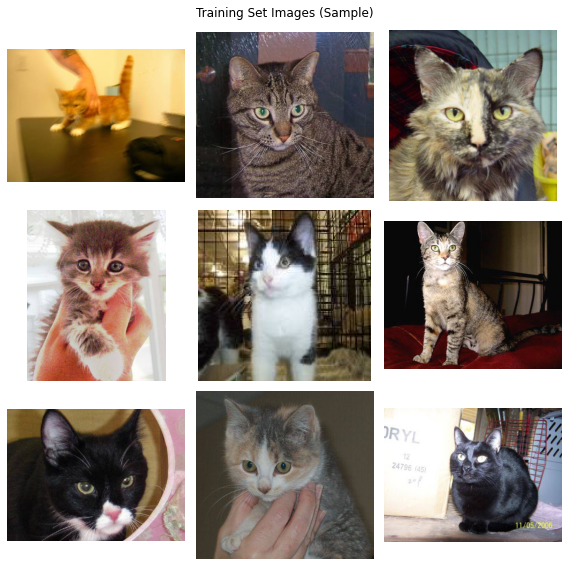

In [277]:
# files = [train_dir + '\\' + x for x in os.listdir(train_dir) if 'jpg' in x]
files = [train_dir + '\\' + x for x in os.listdir(train_dir) if 'jpg' in x]
print(files[0])

fig = plt.figure(1, figsize = (8, 8))
fig.suptitle("Training Set Images (Sample)")

for i in range(9):
    plt.subplot(3, 3, i + 1)
    image = load_img(files[i])
    plt.imshow(image)
    plt.axis("off")
    
plt.tight_layout()
plt.show()

### 강아지만 출력

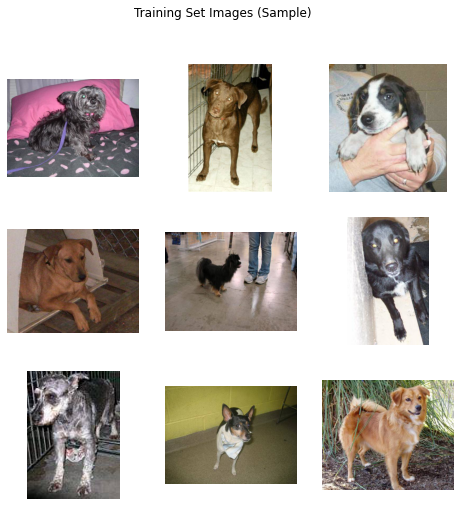

In [262]:
only_dog = []

for i in range(9): # 강아지만
    a = data.iloc[data.query("label=='dog'").index[i]].image.split('.')[1]    
    a = train_dir + '\\' + 'dog.' + a +'.jpg '
    only_dog.append(a)

fig = plt.figure(1, figsize = (8, 8))
fig.suptitle("Training Set Images (Sample)")
for i in range(9):
    plt.subplot(3,3, i + 1)
    image = load_img(only_dog[i])
    plt.imshow(image)
    plt.axis("off")

### 고양이만 출력

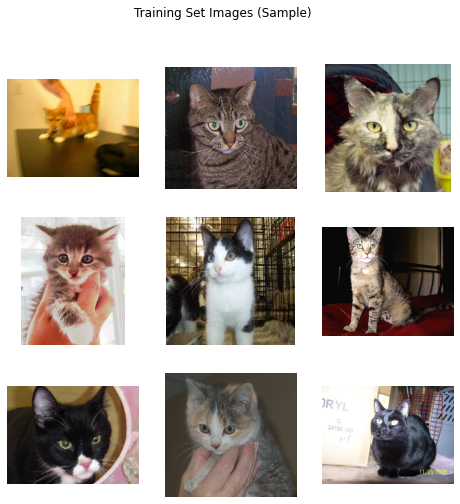

In [264]:
only_cat = []

for i in range(9): # 고양이만
    a = data.iloc[data.query("label=='cat'").index[i]].image.split('.')[1]    
    a = train_dir + '\\' + 'cat.' + a +'.jpg '
    only_cat.append(a)

fig = plt.figure(1, figsize = (8, 8))
fig.suptitle("Training Set Images (Sample)")
for i in range(9):
    plt.subplot(3, 3, i + 1)
    image = load_img(only_cat[i])
    plt.imshow(image)
    plt.axis("off")

# 2. 모델생성

In [267]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu'
                        , input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [271]:
model.compile(loss='binary_crossentropy'
             ,optimizer=tf.keras.optimizers.RMSprop(0.0001)
             ,metrics=['accuracy'])

# 3. 데이터 증강
- 학습데이터 다양성 늘려 CNN 모델 성능 높이려고

In [244]:
print(train_data.shape)
print(val_data.shape)

(20000, 2)
(5000, 2)


In [284]:
datagen = ImageDataGenerator(
    rotation_range = 30
    ,width_shift_range = 0.1
    ,height_shift_range = 0.1
    ,brightness_range = (0.5, 1)
    ,zoom_range = 0.2
    ,horizontal_flip = True
    ,rescale = 1./255,
)

In [302]:
sample_df = train_data.sample(1)
sample_df

,image,label
7627,cat.5612.jpg,cat


Found 1 validated image filenames belonging to 1 classes.


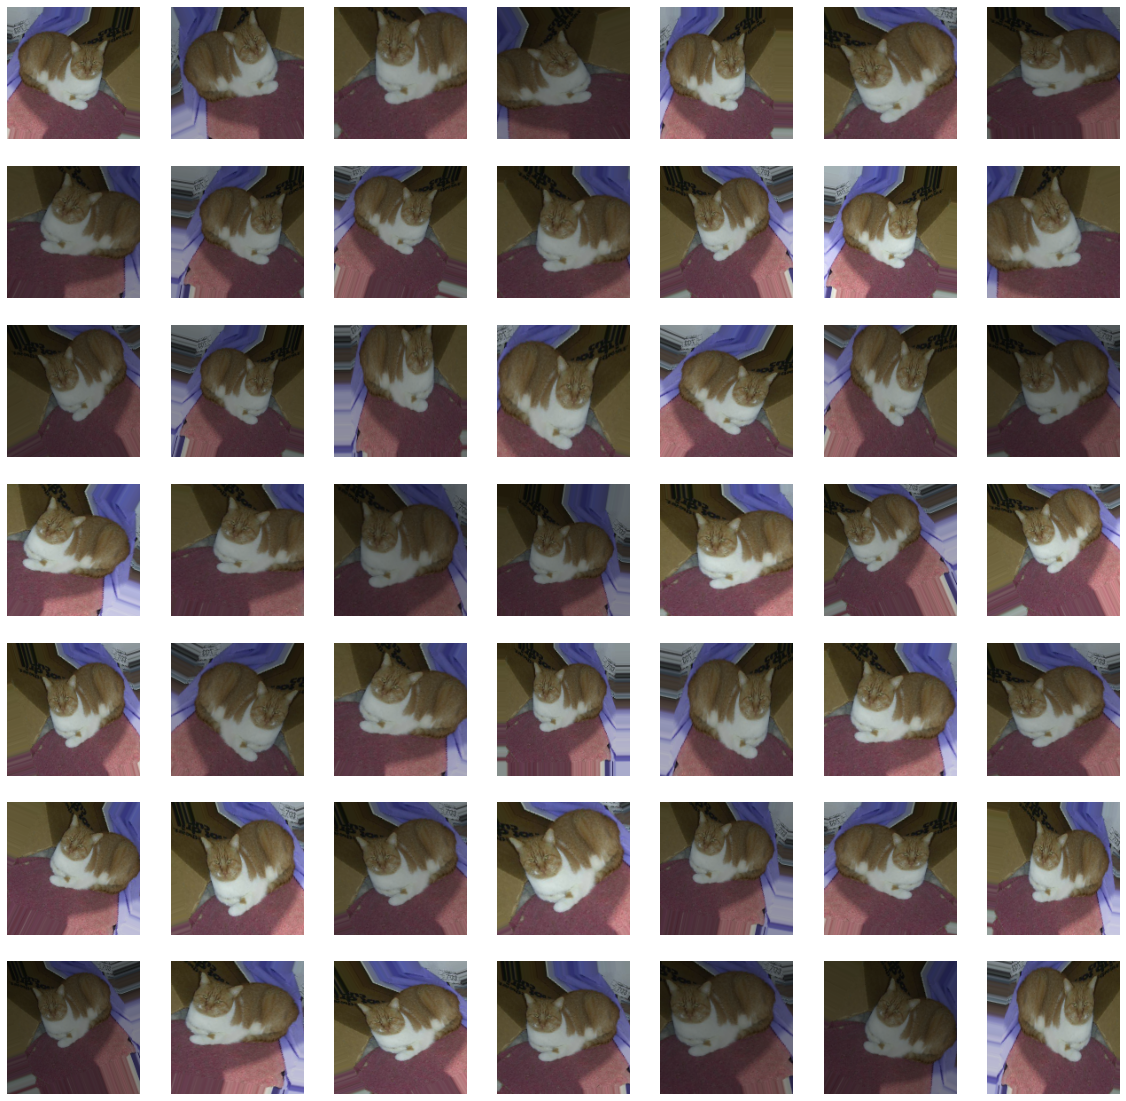

In [303]:
sample_gen = datagen.flow_from_dataframe(
    dataframe=sample_df
    ,directory=train_dir
    ,x_col='image'
    ,y_col='label'
    ,class_mode='categorical' # 2D one-hot 부호화된 라벨이 반환
    ,target_size=(150, 150)
    ,seed=123
)

plt.figure(figsize=(20,20))
for i in range(49):
    plt.subplot(7, 7, i+1)
    for x, y in sample_gen:
        plt.imshow(x[0])
        plt.axis("off")
        break
plt.show()

### ImageDataGenerator 객체 생성

In [312]:
# ImageDataGenerator 객체 생성 -> 적용할 증강 기법 설정
train_data_generator = ImageDataGenerator(
    rescale=1/255.0 # 모든 이미지를 1/255로 스케일을 조정합니다
    ,rotation_range=30
    ,width_shift_range=0.2
    ,height_shift_range=0.2
    ,shear_range=0.2
    ,zoom_range=0.2
    ,horizontal_flip=True
)
# 검증 데이터는 증식되어서는 안 안됨
val_data_generator = ImageDataGenerator(rescale=1./255)


train_generator = train_data_generator.flow_from_dataframe(
        dataframe=train_data # 타깃 디렉터리
        ,directory=train_dir
        ,x_col='image'
        ,y_col='label'
        ,class_mode='categorical' # 2D one-hot 부호화된 라벨이 반환됩니다.
        ,target_size=(150,150)
        ,batch_size=20
        ,seed=123
)

validation_generator = val_data_generator.flow_from_dataframe(
        dataframe=val_data # 타깃 디렉터리
        ,directory=train_dir
        ,x_col='image'
        ,y_col='label'
        ,class_mode='categorical'
        ,target_size=(150,150)
        ,batch_size=20
        ,seed=123
        ,shuffle=False
)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


100/100 [==============================] - 37s 369ms/step - loss: 0.6937 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/30
100/100 [==============================] - 35s 352ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/30
100/100 [==============================] - 35s 352ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/30
100/100 [==============================] - 35s 350ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/30
100/100 [==============================] - 34s 341ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/30
100/100 [==============================] - 35s 349ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/30
100/100 [==============================] - 33s 334ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5

# 4.모델저장

In [ ]:
model.save('cat-and-dog.h5')

# 5. 시각화

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()